In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка датасета
file_path = "../data/raw/flats_moscow.csv"
df = pd.read_csv(file_path)

In [4]:
# 1. Просмотр первых строк датасета
print("Первые 5 строк:")
display(df.head())

Первые 5 строк:


,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [5]:
# 2. Проверка информации о данных
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


In [6]:
# 3. Проверка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Количество пропущенных значений:
Unnamed: 0    0
price         0
totsp         0
livesp        0
kitsp         0
dist          0
metrdist      0
walk          0
brick         0
floor         0
code          0
dtype: int64


In [7]:
# 4. Статистическое описание данных
print("\nСтатистическое описание данных:")
display(df.describe())


Статистическое описание данных:


,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1020.500000,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,589.041594,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,1.000000,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,510.750000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,1020.500000,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,1530.250000,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,2040.000000,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


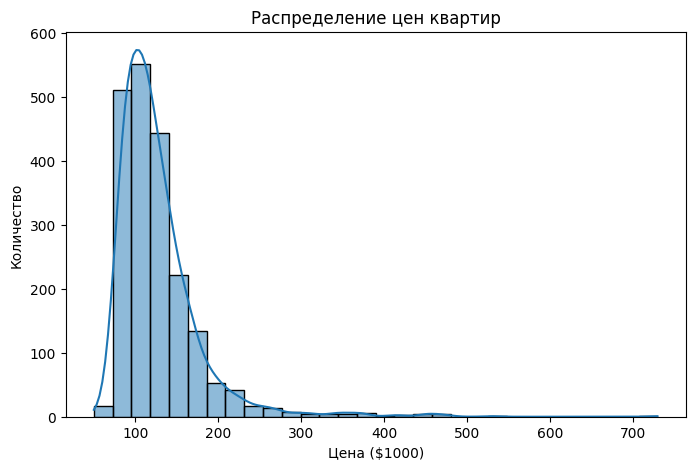

In [8]:
# 5. Построение распределения целевой переменной (цены квартир)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Распределение цен квартир")
plt.xlabel("Цена ($1000)")
plt.ylabel("Количество")
plt.show()

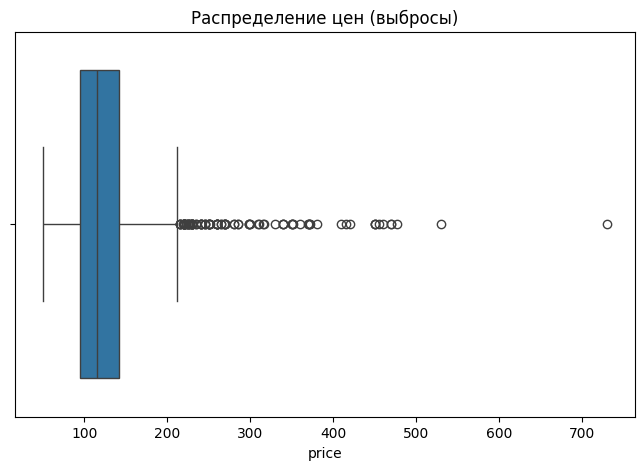

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Распределение цен (выбросы)")
plt.show()

In [10]:
Q1 = df["price"].quantile(0.25)  # 25-й перцентиль
Q3 = df["price"].quantile(0.75)  # 75-й перцентиль
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR  # Нижняя граница выбросов
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница выбросов

print(f"Границы выбросов: {lower_bound} - {upper_bound}")
print(f"Количество выбросов: {df[(df['price'] < lower_bound) | (df['price'] > upper_bound)].shape[0]}")

Границы выбросов: 24.5 - 212.5
Количество выбросов: 98


In [11]:
import numpy as np
df["log_price"] = np.log(df["price"])

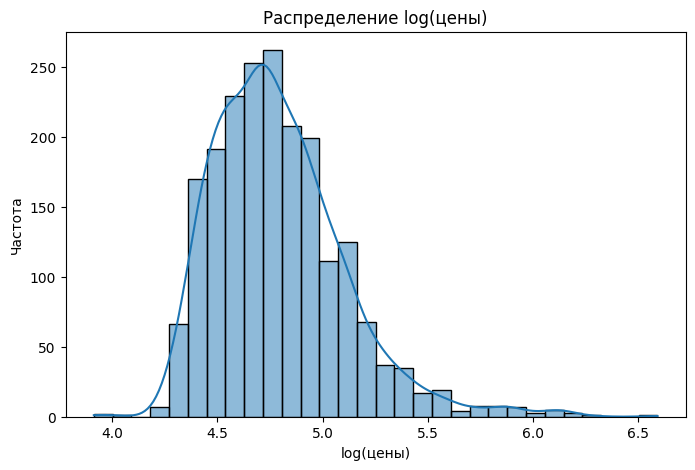

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["log_price"], bins=30, kde=True)
plt.title("Распределение log(цены)")
plt.xlabel("log(цены)")
plt.ylabel("Частота")
plt.show()

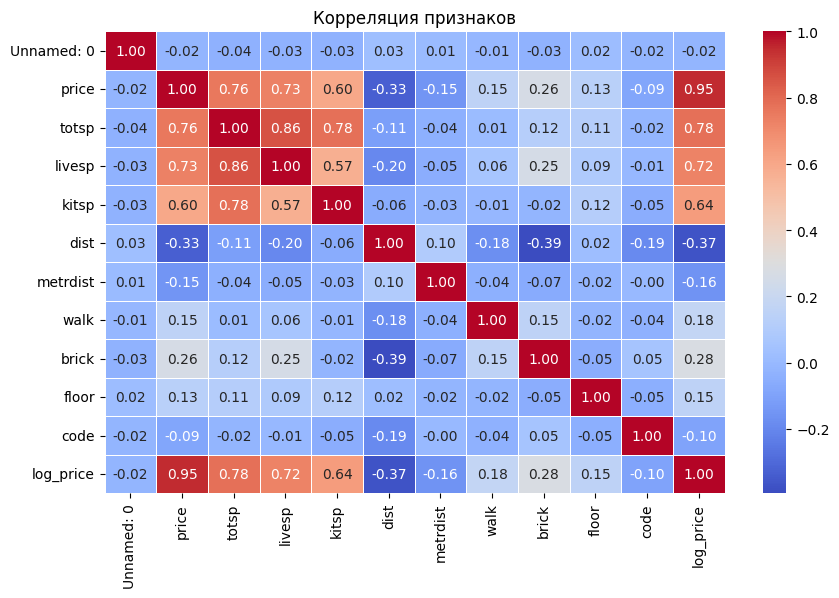

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляция признаков")
plt.show()